In [141]:
#%matplotlib notebook
%matplotlib inline

import csv as csv
import numpy as np
import plotly
import  matplotlib.mlab  as mlab
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

my_project_dir = "C:\\Users\Johnny\Documents\GitHub\Titanic\kaggle_data\\"
print (my_project_dir)

C:\Users\Johnny\Documents\GitHub\Titanic\kaggle_data\


In [142]:
csv_file_object = csv.reader(open(my_project_dir + 'train.csv', 'r'))       # Load in the csv file
header = next(csv_file_object)                     # Skip the fist line as it is a header
data=[]                                            # Create a variable to hold the data

for row in csv_file_object:                        # Skip through each row in the csv file,
    data.append(row[0:])                           # adding each row to the data variable
    

data = np.array(data)                              # importing data as np array
print (header[:])
print (data[0:2,:])


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
[['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
  '7.25' '' 'S']
 ['2' '1' '1' 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
  'female' '38' '1' '0' 'PC 17599' '71.2833' 'C85' 'C']]


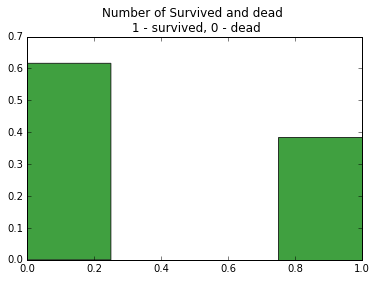

In [143]:
X = data[:,1].astype(np.float)

X_weights = np.ones_like(X)/float(len(X))   


n, bins, patches = plt.hist(X, 4, weights = X_weights,  facecolor='g', alpha=0.75)
plt.title('Number of Survived and dead \n 1 - survived, 0 - dead')
plt.show()

#print (n,bins, patches[:])



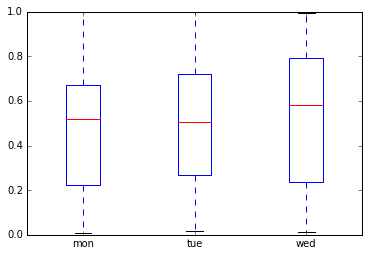

In [145]:
data = [[np.random.rand(100)] for i in range(3)]
pl.boxplot(data)
pl.xticks([1, 2, 3], ['mon', 'tue', 'wed'])
pl.show()